In [1]:
from deepface import DeepFace
import deepface
import cv2
from matplotlib import pyplot as plt

In [2]:
img_path = '../imgs/test-1.jpeg'

In [9]:
obj = DeepFace.analyze('../imgs/test-1.jpeg')
obj

Action: race: 100%|██████████| 4/4 [00:06<00:00,  1.52s/it]   


{'emotion': {'angry': 8.717870869645594e-09,
  'disgust': 1.0153339964247806e-23,
  'fear': 9.566393899262948e-07,
  'happy': 1.63187274804244e-07,
  'sad': 9.233262687757815e-06,
  'surprise': 0.0005553820756176719,
  'neutral': 99.99943971633911},
 'dominant_emotion': 'neutral',
 'region': {'x': 1099, 'y': 833, 'w': 1145, 'h': 1145},
 'age': 33,
 'gender': 'Man',
 'race': {'asian': 24.840916693210602,
  'indian': 5.699528381228447,
  'black': 1.9201040267944336,
  'white': 37.186697125434875,
  'middle eastern': 17.019790410995483,
  'latino hispanic': 13.332964479923248},
 'dominant_race': 'white'}

In [3]:
def print_image(img, title='result', covert_colors=False):
    copy_img = img.copy()
    if covert_colors:
        copy_img = cv2.cvtColor(copy_img, cv2.COLOR_BGRA2RGBA)
    plt.imshow(copy_img[:, :])
    plt.title(title)
    plt.show()

def print_face_rectangle(img, rectangle):
    x = rectangle[0]
    y = rectangle[1]
    w = rectangle[2]
    h = rectangle[3]
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img

In [32]:
face = DeepFace.detectFace(img_path=img_path, detector_backend='retinaface')

retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: /Users/ardasovvadim/.deepface/weights/retinaface.h5
100%|██████████| 119M/119M [00:10<00:00, 10.9MB/s] 


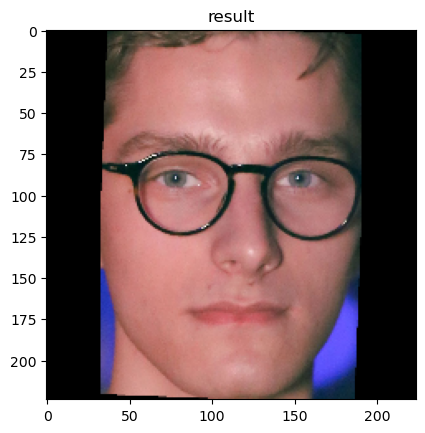

In [33]:
print_image(face)

In [53]:
models = [
    # 0
    # {'verified': True,
    #  'distance': 0.3515611488958631,
    #  'threshold': 0.4,
    #  'model': 'VGG-Face',
    #  'detector_backend': 'opencv',
    #  'similarity_metric': 'cosine'}
    'VGG-Face',
    # 1
    # {'verified': False,
    #  'distance': 0.8620863795280457,
    #  'threshold': 0.4,
    #  'model': 'Facenet',
    #  'detector_backend': 'opencv',
    #  'similarity_metric': 'cosine'}
    'Facenet',
    # 2
    # {'verified': False,
    #  'distance': 0.31847550445894246,
    #  'threshold': 0.1,
    #  'model': 'OpenFace',
    #  'detector_backend': 'opencv',
    #  'similarity_metric': 'cosine'}
    'OpenFace',
    # 3
    # {'verified': False,
    #  'distance': 0.47916389654172953,
    #  'threshold': 0.23,
    #  'model': 'DeepFace',
    #  'detector_backend': 'opencv',
    #  'similarity_metric': 'cosine'}
    'DeepFace',
    # 4
    # not working
    'DeepID',
    # 5
    # not working
    'Dlib',
    # 6
    # {'verified': False,
    #  'distance': 0.9563385148719878,
    #  'threshold': 0.68,
    #  'model': 'ArcFace',
    #  'detector_backend': 'opencv',
    #  'similarity_metric': 'cosine'}
    'ArcFace',
    # 7
    # not working
    'Ensemble'
]

result = DeepFace.verify(
    # img1_path="../imgs/test-3.png",
    img1_path="../imgs/recog-test-1.jpeg",
    img2_path="../imgs/test-2.jpg",
    model_name=models[0]
)
result

{'verified': True,
 'distance': 0.3515611488958631,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [124]:
models = [
    # 0
    # + working
    'opencv',
    # 1
    # - module 'cv2' has no attribute 'dnn'
    'ssd',
    # 2
    # - No module named 'dlib'
    'dlib',
    # 3
    # + working
    'mtcnn',
    # 4
    # + working
    'retinaface',
    # 5
    # - No module named 'mediapipe'
    'mediapipe'
]

img = DeepFace.functions.load_image('../imgs/detecting-test-4.jpg')
base_img = img.copy()
detected_face, img_region = DeepFace.functions.detect_face(img, detector_backend=models[0], align=False)

In [83]:
img_region

[509, 286, 139, 173]

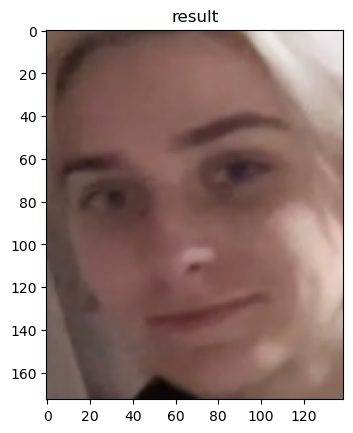

In [84]:
print_image(detected_face, covert_colors=True)

In [4]:
from deepface.detectors import OpenCvWrapper
from deepface.detectors import SsdWrapper
from deepface.detectors import DlibWrapper
from deepface.detectors import MtcnnWrapper
from deepface.detectors import RetinaFaceWrapper
from deepface.detectors import MediapipeWrapper
from deepface.detectors import FaceDetector

def detect_faces(img, detector_backend, align=True):
    face_detector = FaceDetector.build_model(detector_backend)

    backends = {
        'opencv': OpenCvWrapper.detect_face,
        'ssd': SsdWrapper.detect_face,
        'dlib': DlibWrapper.detect_face,
        'mtcnn': MtcnnWrapper.detect_face,
        'retinaface': RetinaFaceWrapper.detect_face,
        'mediapipe': MediapipeWrapper.detect_face
    }

    detect_face = backends.get(detector_backend)

    if detect_face:
        obj = detect_face(face_detector, img, align)
        #obj stores list of detected_face and region pair

        return obj
    else:
        raise ValueError("invalid detector_backend passed - " + detector_backend)

In [ ]:
models = [
    # 0
    # + working
    'opencv',
    # 1
    # - module 'cv2' has no attribute 'dnn'
    'ssd',
    # 2
    # - No module named 'dlib'
    'dlib',
    # 3
    # + working
    'mtcnn',
    # 4
    # + working
    'retinaface',
    # 5
    # - No module named 'mediapipe'
    'mediapipe'
]

img = DeepFace.functions.load_image('../imgs/recognition-test-2.jpg')
res = detect_faces(img, detector_backend=models[2], align=False)
print(len(res))
print_image(img, covert_colors=True)

[509, 286, 139, 173]
[891, 275, 155, 211]
[1183, 281, 140, 172]
[230, 269, 155, 213]


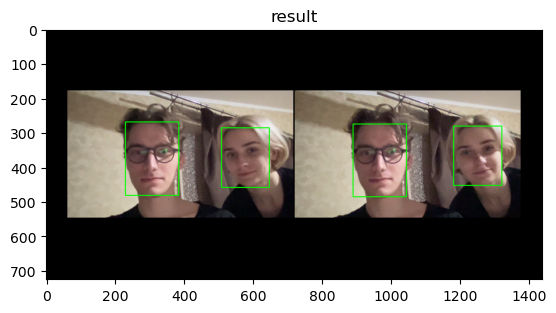

In [143]:
cimg = img.copy()

for r in res:
    detected_face, img_region = r
    print(img_region)
    cimg = print_face_rectangle(cimg, img_region)

print_image(cimg, covert_colors=True)

In [120]:
jsonData = '{"prop1": "value", "prop2": 1, "prop3": {"prop4": "xxx"}}'

In [121]:
import json

obj = json.loads(jsonData)
obj

{'prop1': 'value', 'prop2': 1, 'prop3': {'prop4': 'xxx'}}

In [122]:
obj['prop3']["prop4"]

'xxx'

In [123]:
json.dumps(obj)

'{"prop1": "value", "prop2": 1, "prop3": {"prop4": "xxx"}}'